# Findings and Next Steps

In this section

- A final model (XGBoost) will be trained using the data set


- Summary of findings will be discussed throughout the sections of the project will be discussed 


- Next steps 

### Importing  all the necessary libraries

In [9]:
import pandas as pd
import numpy as np

#ploting 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

#modeling and evaluation

from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Final modeling

- import clean data

In [4]:
df = pd.read_csv('clean_data/clean_data.csv',index_col=0)

df.head()

,order_id,customer_id,product_id,seller_id,order_item_id,order_status,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,...,distance_in_km,carrier_Week,carrier_Year,carrier_DofW,Holiday,customer_state_encode,seller_state_encode,distance_category,same_state,delivery_window
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-06 11:07:15,2017-10-04 19:55:00,...,18.051106,40,2017,2,0,1.0,1,0,1,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,1,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-30 03:24:27,2018-07-26 14:31:00,...,852.256379,30,2018,3,0,0.0,1,3,0,2
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,1,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-13 08:55:23,2018-08-08 13:50:00,...,511.820721,32,2018,2,1,0.0,1,2,0,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,1,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-23 19:45:59,2017-11-22 13:39:59,...,1816.652139,47,2017,2,1,0.0,0,3,0,2
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,1,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-19 20:31:37,2018-02-14 19:46:34,...,30.189028,7,2018,2,1,1.0,1,0,1,0


- Selecting out target and features

In [5]:
X_full = df.drop('delivery_window',axis=1).copy() 

y= df['delivery_window'] #target

 - Bringing in our selected features from previous note books

In [6]:
features = ['product_weight_g','carrier_Week','price','carrier_DofW','freight_value','order_item_id',
       'product_volume_cm3', 'distance_category','same_state','customer_state_encode','seller_state_encode','Holiday']

X = X_full[features]

- Spliting data into train and test split

In [12]:
#split to full_training and test sets
X_train_full,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=42,stratify=y)

- Next we scaled the data using MinMax scalar

In [13]:
min_max = MinMaxScaler()
X_train_scaled = min_max.fit_transform(X_train_full)
X_test_scaled = min_max.transform(X_test)

- We know our best model is the XGboost and we also know the best parameters from the modeling notebook.

In [11]:
tuned_xgb_params = {'max_depth': 8,
 'learning_rate': 0.03286227389731753,
 'n_estimators': 2744,
 'min_child_weight': 3,
 'colsample_bytree': 0.7310402744020237,
 'subsample': 0.7949429166896618,
 'reg_alpha': 1.4819398025141877,
 'reg_lambda': 0.0001069849518239625}

- Training our data set with the tuned parameters `tuned_xgb_params`

In [14]:
XGB_model = XGBClassifier(**tuned_xgb_params)
XGB_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7310402744020237, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.03286227389731753, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=2744, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0,
              reg_alpha=1.4819398025141877, reg_lambda=0.0001069849518239625,
              scale_pos_weight=None, subsample=0.7949429166896618,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
XGB_score  = round(XGB_model.score(X_test_scaled,y_test)*100,2)

print(f'The accuracy score on test set is: {XGB_score}%')

The accuracy score on test set is: 72.68%


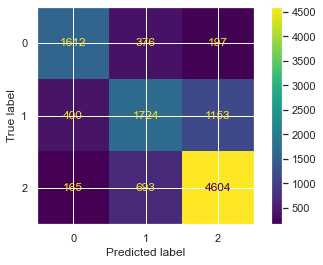

In [16]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(XGB_model, X_test_scaled, y_test);

Worthy of note is the misclassification of `1153 orders` in the category 1

we can take a look at the calissfication report for more insights

In [17]:
XGB_y_pred = XGB_model.predict(X_test_scaled)
report_initial = classification_report(y_test, XGB_y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2185
           1       0.62      0.53      0.57      3277
           2       0.77      0.84      0.81      5462

    accuracy                           0.73     10924
   macro avg       0.71      0.70      0.70     10924
weighted avg       0.72      0.73      0.72     10924



Our model preforms a expected with 

- `73%` overall accuracy 


- A recall of `53%` and in class accuarcy(`f1 score`) of `57%` for `3-7 days` order

---


## Summary of Findings

### **Problem Space**

At the start of this project, the problem space was discussed and how this project would help business reduce cost and improve customer satisfaction through on-time delivery

- There is a noticeable increase in e-commerce activity in the last 2 years and this is putting a strain on the global supply chain and logistics operation as a whole.


- The last mile is arguably the biggest problem in e-commerce as it addresses the question, **`“When will I receive my order?”`**.


- Industry leaders, such as Shopify, Amazon, and Uber have had to focus on the last mile delivery aspect of the supply chain as this has a direct impact on sales and overall service delivery.


- When predicting CDT, **`setting thresholds is dependent on the type of business`** e.g Ubereats, Amazon, and crude oil shipping have different thresholds.


- Over- and Underestimation of CDT is very common, everyone has experienced this with online vendors at one time or the other, **`both are very bad for business`**.






### **Data**

Data that fit into problem description was sourced and **`Olist`** data was found to be the most suitable


- The data used is for a Brazilian e-commerce company, **`Olist, hosted on Kaggle`**.


- Merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.


- The dataset has information of **`110k orders from Oct. 2016 to  Oct. 2018`**.


- The Data set has **`8 different tables`** representing information about orders, customers, sellers, products, and geolocations.


- Our target is to **`predict the delivery time`** and compare it with previous predictions done by the Olist team




### **EDA and Pre-processing**


This was approached by segmenting tables to customer, seller, orders, and product, then doing deep dive into these tables

- The geolocation table has 1million  data points/locations but 980k are duplicated, this was cleaned up.


- Delivery times(days) were calculated from courier pick-up date and customer delivery dates and customer distance was calculated. **`Brazilian holidays was also scraped from the internet`**


-  **`Most of the orders originate from the states of São Paulo (~41% of all orders)`**and Rio de Janeiro (~13% of all orders), both are also coincidentally cities too.


- **`Olist overestimates delivery times by about 11 days on average`** and The average actual delivery time is 9 days. This  means they predict 20days on most deliveries but delivers on the 9th day on average


- **`Deliveries above 20days are ~10% of the data`** and actual delivery from EDA shows delivery can take up to **`200days after logistics partner pickup`**.


- Consolidating the data tables in the schema; customers, sellers, orders, ordersItems and products, **`ended up with ~110k rows and 30 columns`**.



### **Feature Selection**


- Features in the categories of **`customers`** (distance, state category, same state orders), **`orders`** (product size and weight) and **`external factors`** (Holidays) were added to the data set

- Imbalance in data set for some features such as **`product_weight_g`,`price`,`freight value` `product_volume_cm3` and `distance`** were adequately addressed.


- The target variable was divided into 3 delivery windows for better modeling **`less than 3-days`,`3-7 days` and `over 7 days`**


### **Modeling**


- Base model was a `Logistic Regression` and was hypertuned with a test accuracy of `~64%`, but performs woefully in classifying `3-7 days` delivery window. This was investgated and no tangible pattern was found in this category.


- `Pycaret` was used in the model selection process, `Random Forest` and `Gradient Boosting` models(XGBoost) perfoms well on the data.


- `Random Forest` and `XGBoost` had a test accuracy of `~70%` and `~73%` respectively and XGBoost classified the `3-7 days` delivery window much better with recall of `53%`


- `Neural Network` was tuned using optuna, but didn't perform well on the data, with a accuracy of `68%` and recall of `41%` on the `3-7 days` delivery window. **model appears to be stuck at `~69% accuracy on validation set`** for any of the designed NN architecture.


- Overall `XGBoost` is the best model with `~73%` accuracy

---

## Next Steps

The **`business application`** on this model is enormous as it can be used to help customers and logistics companies plan delivery times based on delivery windows as used in this project, thereby reducing cost associated with last mile delivery problems.


Although the model currently does a great job at predicting delivery time with **overall accuracy of 72%**, **`there are a few requirements and implementations that would improve the work already done on this project`**.



- A more robust dataset is required that would give a good level of detail on the logistics partner operations to help with an overview of their fulfillment centres and work schedule. This will help predict the hour of the day of delivery to the nearest minute.



- Explore and research more on  how other types of neural networks(RNN and CNN) can help in improving accuracy of our model



- Investigate further on why recall for the `3-7 days delivery window`, performing badly.


